# In this tutorial we are going derive linear regression y =  β1x + B2x^2 + B3x^3 + B0
* First we just plot a simple linear line 
* Write the equations to determine simple linear regression



In [26]:
import numpy as np
import matplotlib.pyplot as plt

### y = 4x + 3x^2 + 2x^3 + 5
* y = 5 + 4x + 3x^2 + 2x^3
* y = x0 + x1 + x2 + x3
(equal diamensions)

In [27]:
β0, β1, β2, β3 = 5, 4, 3, 2

In [28]:


x = np.linspace(-10, 10, 400)  # 400 points between -10 and 10


# Compute y values
x0 = np.ones(len(x)) * β0

x1 = x * β1 

x2 = x ** 2 * β2

x3 = x ** 3 * β3

y = x0 + x1 + x2 + x3


# Given input matrix of size n x number of columns of predictors predict n x 1 y predictions
* n x (number predictors) = [x0, x1, x2, x3] 
* n x 1 = [y]

## Assumptions of errors e, Stats 601 Dr. Cline, I miss stats (notice there is no error term we looking for the actual values β0, β1, β2, β3) 

ignore this but this is what we are minimizing it's zero anyways
* The errors are independent 
* Mean zero or centered around zero 
* Constant varience 
* Follow a normal distribution 

In short independent and identically distributed 


In [29]:
# Add some noise
e = np.random.normal(0, 1, len(x)) # mean zero and sd one, more samples means constant varience to fix structural shape 
Yi = y + e

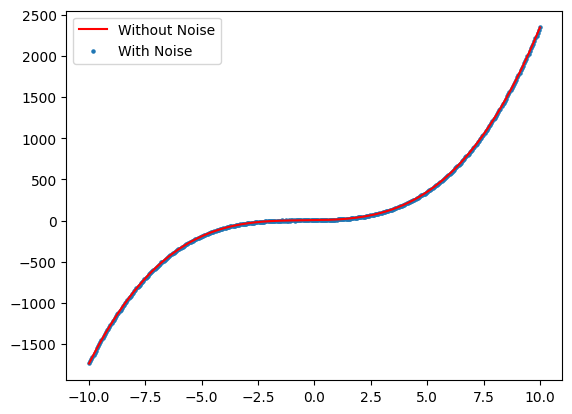

In [30]:

# Plot the data
plt.plot(x, y, 'r-', label='Without Noise')
plt.scatter(x, Yi, s=5, label='With Noise')
plt.legend()
plt.show()


## Yi = β0 + β1X1 + β2X2 + β3X3 + ..... + εi
* Xi and Yi we aready have input and output machinelearninng is about finding the path from Xi to Yi
* minimize SSE (y - Yi)^2 easiest form compared to rmse or mse  
* [simplest one](https://tahera-firdose.medium.com/linear-regression-derivation-of-slope-and-intercept-using-ordinary-least-square-971534ec6b77)
* [more detailed](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)
* β1 is cov(x,y) divided by the variance(x), y is what we trying to get ps if we also devide by var(y) it would be pearson correlation 

# Notice Simple Linear Regression Doesn't have terms for β2, β3, ..... βn because it's a straight line 2 dimensional, we can't plot N*D but imagine the bending in the straight line is being caused by other dimensions our predictions suck but don't confuse this with a poly normial this was on purpose to prove we can calculate [x0, x1, ... , xn-1 + xn]

In [31]:
def mean(values):
    return sum(values) / float(len(values))

def covariance(x, mean_x, y, mean_y):
    covar = 0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def variance(values, mean_value):
    return sum([(x - mean_value)**2 for x in values])

def coefficients(x, y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

def linear_regression(x, y, input_value):
    b0, b1 = coefficients(x, y)
    y_pred = b0 + b1 * input_value
    return y_pred


In [32]:

input_value = x
predicted_y = linear_regression(x, y, input_value)

In [33]:
len(predicted_y)

400

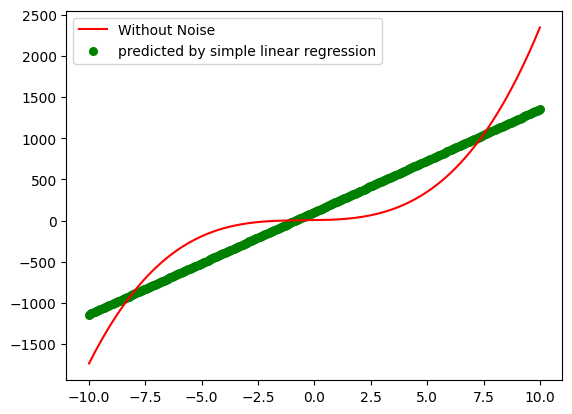

In [34]:
# Plot the data
plt.plot(x, y, 'r-', label='Without Noise')
# plt.scatter(x, Yi, s=5, label='With Noise')
plt.scatter(x, predicted_y,c='green', s = 30, label='predicted by simple linear regression')
plt.legend()
plt.show()